<h1>Task 1: Data-Exploration</h1>

**Course:** Introduction to Data Science <br>
**Lecturer:** Prof. Dr. Hendrik Meth
<br>
<br>
**Group 2:**<br>
Linus Breitenberger<br>
Tristan Ruhm<br>
Prarichut Paochanuan<br>
Patryk Gadziomski<br>

<div style="width:100%;height:30px;background-color:#E31134"></div>

Importing necessary libraries and reading the training- and test-file.

In [22]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import numpy as np  # For numerical operations
import seaborn as sns  # For statistical data visualization

# Read the training data from a CSV file into a pandas DataFrame
with open("BikeRentalDaily_train.csv", "r", encoding="utf-8") as f_train:
    df_train = pd.read_csv(f_train, delimiter=";")

# Read the testing data from a CSV file into a pandas DataFrame
with open('BikeRentalDaily_test.csv', 'r', encoding='utf-8') as f_test:
    df_test = pd.read_csv(f_test, delimiter=';')

<hr>

Printing the train dataframe (`df_train`) to have a first look at it.

In [23]:
df_train

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022,1,1424,1693,3117
596,81,22.03.2011,NaN,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894


Printing the test dataframe (`df_test`) to have a first look at it.

In [24]:
df_test

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,1,1,1,17.3565,0.427513,75.65220,0.312139,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,6,0,1,13.0000,0.326383,81.81255,0.179729,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,-1,1,1,9.5333,0.270196,NaN,0.063450,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,2,1,2,21.3000,0.522721,105.25005,0.110087,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,4,1,1,19.4333,0.475371,92.31255,0.226987,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,6,0,1,30.6000,0.687508,90.18750,0.161071,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,-1,1,2,25.4000,0.575158,127.31250,0.148629,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,3,1,1,29.1333,0.654688,74.68755,0.261821,585,0,848,4377,5225


<hr>

Printing the results of the `describe()`-function to have a look at the descriptive statistics of the train data.

In [25]:
df_train.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,600.000000,538.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,566.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,363.116667,2.436803,0.496667,6.475000,0.03000,2.928333,0.680000,1.401667,19.808284,0.473620,93.845200,0.183696,740.065000,0.150000,1070.895000,3634.116667,4705.011667
std,208.711917,1.107240,0.500406,3.442741,0.17073,2.079360,0.466865,0.542360,7.206843,0.160439,21.380635,0.125257,164.430095,0.357369,2971.316154,1538.698254,3588.750428
min,1.000000,1.000000,0.000000,1.000000,0.00000,-1.000000,0.000000,1.000000,2.365200,0.079070,28.187550,-1.000000,459.000000,0.000000,2.000000,20.000000,22.000000
25%,181.250000,1.000000,0.000000,4.000000,0.00000,1.000000,0.000000,1.000000,13.575000,0.338256,77.328150,0.134335,600.750000,0.000000,313.000000,2499.000000,3135.000000
50%,362.500000,2.000000,0.000000,6.000000,0.00000,3.000000,1.000000,1.000000,20.100000,0.489690,93.256800,0.180971,737.000000,0.000000,722.000000,3657.000000,4530.000000
75%,538.250000,3.000000,1.000000,9.000000,0.00000,5.000000,1.000000,2.000000,26.058300,0.605127,109.921913,0.233947,875.500000,0.000000,1078.000000,4680.250000,5909.500000
max,731.000000,4.000000,1.000000,12.000000,1.00000,6.000000,1.000000,3.000000,34.466700,0.826371,145.875000,0.507463,1032.000000,1.000000,47138.000000,6946.000000,53021.000000


**Oberservations from the `describe()-function` of the train data**

- Max value of `hum` (humidity) is 145.87...  `hum` is measured in % that value is invalid

- The columns `season` and `hum` have missing values

- `windspeed` has negative values

- `weekday` has negative values

Printing the results of the `describe()`-function to have a look at the descriptive statistics of the test data.

In [26]:
df_test.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,132.000000,121.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,126.000000,132.000000,132.00000,132.000000,132.000000,132.000000,132.000000
mean,378.598485,2.652893,0.515152,6.750000,0.022727,2.590909,0.704545,1.371212,19.844301,0.477679,93.645418,0.185349,749.55303,0.166667,999.825758,3755.166667,4754.992424
std,221.672024,1.123319,0.501674,3.497818,0.149600,2.154188,0.457985,0.558150,7.827241,0.173988,21.467624,0.068409,178.50004,0.374098,2313.057147,1651.661972,3118.721529
min,7.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,3.895700,0.117930,0.000000,0.042304,458.00000,0.000000,9.000000,416.000000,431.000000
25%,195.500000,2.000000,0.000000,3.750000,0.000000,1.000000,0.000000,1.000000,13.300000,0.325754,80.692913,0.135898,583.50000,0.000000,330.750000,2532.750000,3289.500000
50%,387.500000,3.000000,1.000000,7.000000,0.000000,2.000000,1.000000,1.000000,19.200000,0.470002,93.468750,0.179102,745.00000,0.000000,693.500000,3705.000000,4621.000000
75%,579.250000,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,27.366675,0.635919,107.484413,0.227141,918.00000,0.000000,1138.500000,5112.000000,6145.250000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,33.933300,0.840896,139.500000,0.385571,1028.00000,1.000000,26506.000000,6803.000000,32472.000000


**Oberservations from the `describe()`-function of the test data**

- `weekday` also has negative values

- `humidity` also has values above 100

<hr>

Printing the results of the `info()`-function to have a look at the information about the dataframe of the train data.

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          600 non-null    int64  
 1   dteday           600 non-null    object 
 2   season           538 non-null    float64
 3   yr               600 non-null    int64  
 4   mnth             600 non-null    int64  
 5   holiday          600 non-null    int64  
 6   weekday          600 non-null    int64  
 7   workingday       600 non-null    int64  
 8   weathersit       600 non-null    int64  
 9   temp             600 non-null    float64
 10  atemp            600 non-null    float64
 11  hum              566 non-null    float64
 12  windspeed        600 non-null    float64
 13  leaflets         600 non-null    int64  
 14  price reduction  600 non-null    int64  
 15  casual           600 non-null    int64  
 16  registered       600 non-null    int64  
 17  cnt             

**Oberservations from the `info()-`function on the train Data**

 - The `dteday` column is of type `object`. Depending on our analysis, we might want to convert it to a datetime format for better handling of date-related operations.
 
 - We see missing values of `hum` and `season` again

Printing the results of the `info()`-function to have a look at the information about the dataframe of the test data.

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          132 non-null    int64  
 1   dteday           132 non-null    object 
 2   season           121 non-null    float64
 3   yr               132 non-null    int64  
 4   mnth             132 non-null    int64  
 5   holiday          132 non-null    int64  
 6   weekday          132 non-null    int64  
 7   workingday       132 non-null    int64  
 8   weathersit       132 non-null    int64  
 9   temp             132 non-null    float64
 10  atemp            132 non-null    float64
 11  hum              126 non-null    float64
 12  windspeed        132 non-null    float64
 13  leaflets         132 non-null    int64  
 14  price reduction  132 non-null    int64  
 15  casual           132 non-null    int64  
 16  registered       132 non-null    int64  
 17  cnt             

**Oberservations from the `info()`-function on the test Data**

 - The `dteday` column is of type `object`. Depending on our analysis, we might want to convert it to a datetime format for better handling of date-related operations.

<hr>

A Look at `instant` and `dteday` of the train data.

In [29]:
df_train[['instant', 'dteday']]

,instant,dteday
0,154,03.06.2011
1,685,15.11.2012
2,368,03.01.2012
3,472,16.04.2012
4,442,17.03.2012
...,...,...
595,78,19.03.2011
596,81,22.03.2011
597,377,12.01.2012
598,299,26.10.2011


A Look at `instant` and `dteday` of the test data.

In [30]:
df_test[['instant', 'dteday']]

,instant,dteday
0,299,26.10.2011
1,458,02.04.2012
2,687,17.11.2012
3,346,12.12.2011
4,291,18.10.2011
...,...,...
127,426,01.03.2012
128,547,30.06.2012
129,271,28.09.2011
130,180,29.06.2011


For a better overview and prober working, we could sort `instant` ascending to get a chronical order of `dtdays` and then set `instant` to index.

<hr>

<h1>Data Visualisations</h1>

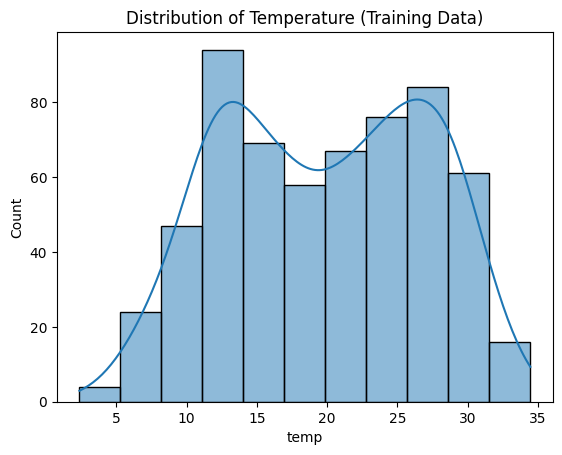

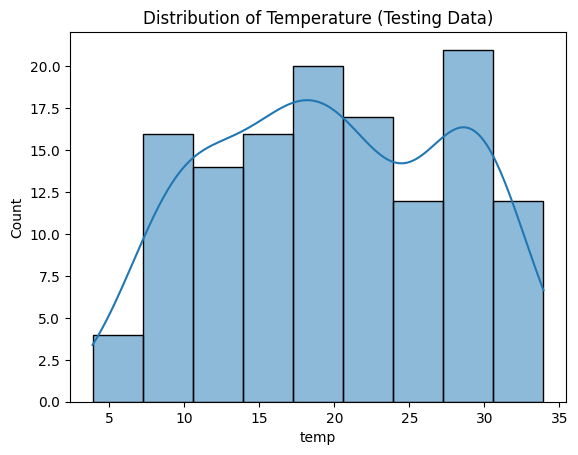

In [31]:
# Visualize the distribution of temperature on train data
sns.histplot(df_train['temp'], kde=True)
plt.title('Distribution of Temperature (Training Data)')
plt.show()

# Visualize the distribution of temperature on test data
sns.histplot(df_test['temp'], kde=True)
plt.title('Distribution of Temperature (Testing Data)')
plt.show()

Both Histplots show, what we expectet, higher total `count` with pleasant `temperature` and low `count` in cold weather or above 30 degrees centigrade

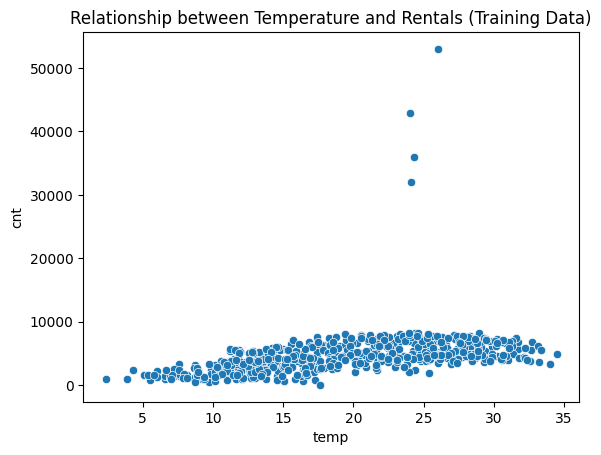

In [32]:
# Visualize the relationship between temperature and rentals (cnt)
sns.scatterplot(x='temp', y='cnt', data=df_train)
plt.title('Relationship between Temperature and Rentals (Training Data)')
plt.show()

We notice 4 outliers in the 30-55k range on the train dataset

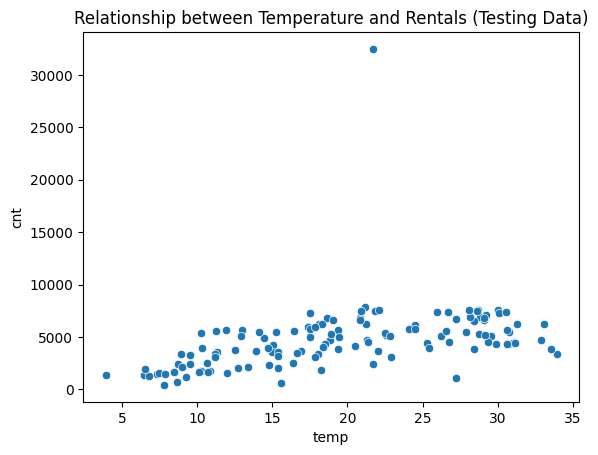

In [33]:
# Visualize the relationship between temperature and rentals on train data (cnt)
sns.scatterplot(x='temp', y='cnt', data=df_test)
plt.title('Relationship between Temperature and Rentals (Testing Data)')
plt.show()

We notice 1 outlier above 30k on the train dataset

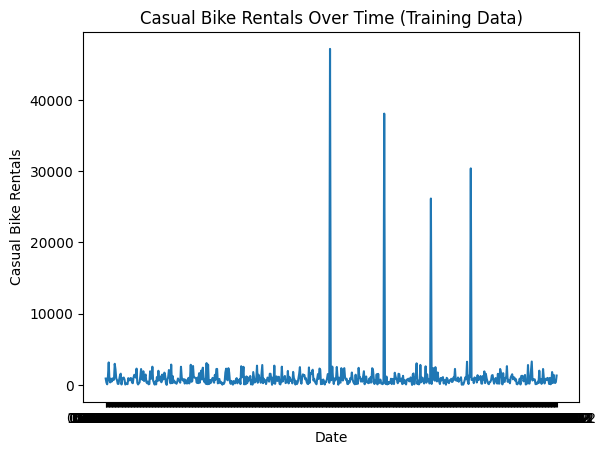

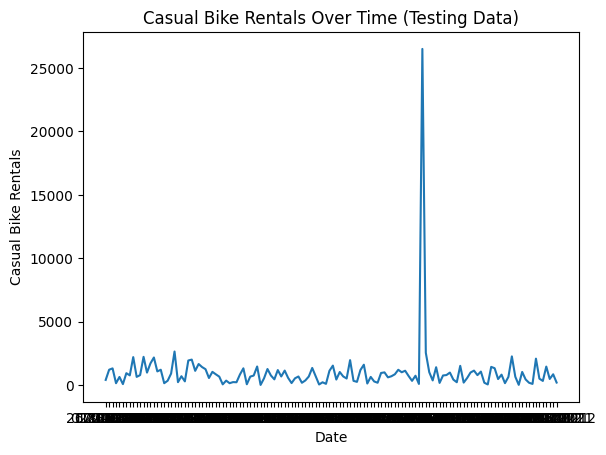

In [34]:
# Plotting a line plot using seaborn
# x="dteday": Specifies the column for the x-axis (date in this case)
# y="casual": Specifies the column for the y-axis (casual bike rentals in this case)
sns.lineplot(data=df_train, x="dteday", y="casual")

# Adding labels and title to the plot for better interpretation
plt.xlabel("Date")  # X-axis label
plt.ylabel("Casual Bike Rentals")  # Y-axis label
plt.title("Casual Bike Rentals Over Time (Training Data)")  # Plot title

# Display the plot
plt.show()

sns.lineplot(data=df_test, x="dteday", y="casual")

# Adding labels and title to the plot for better interpretation
plt.xlabel("Date")  # X-axis label
plt.ylabel("Casual Bike Rentals")  # Y-axis label
plt.title("Casual Bike Rentals Over Time (Testing Data)")  # Plot title

# Display the plot
plt.show()

The outliers make it difficult to visualize the data properly - It would be good to scale some values like `casual`, `registered` and `cnt`

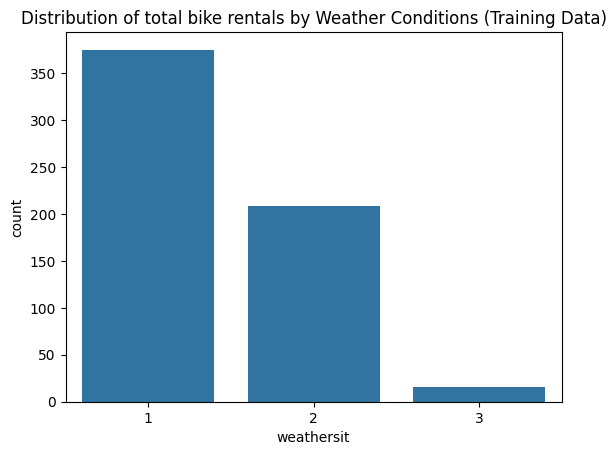

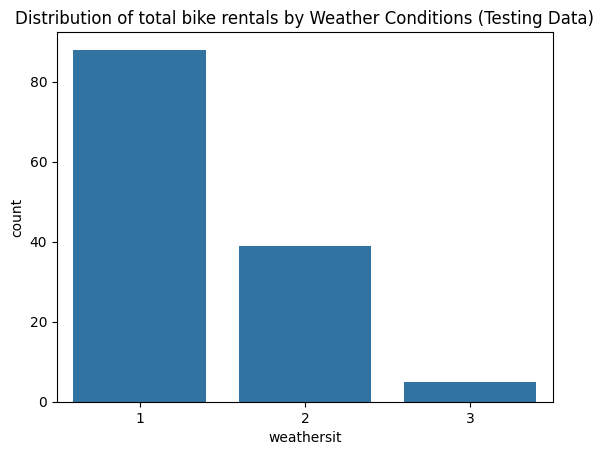

In [35]:
# Visualize the distribution of weather conditions
sns.countplot(x='weathersit', data=df_train)
plt.title('Distribution of total bike rentals by Weather Conditions (Training Data)')
plt.show()

sns.countplot(x='weathersit', data=df_test)
plt.title('Distribution of total bike rentals by Weather Conditions (Testing Data)')
plt.show()

This countplot shows what is expected, more rentals in nice weather conditions and low rentals on bad weather conditions. Notice Weather condition 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) is never present.

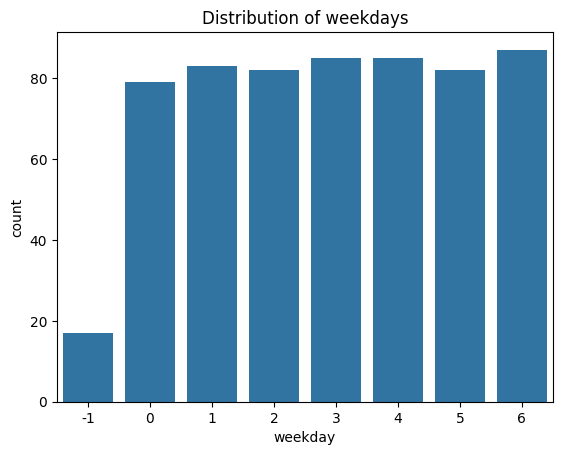

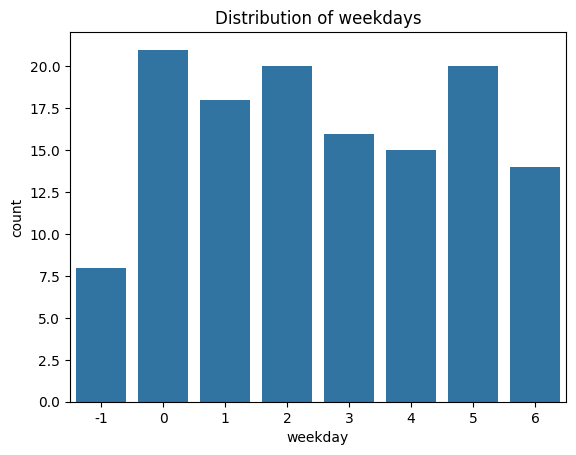

In [36]:
sns.countplot(x='weekday', data=df_train)
plt.title('Distribution of weekdays')
plt.show()

sns.countplot(x='weekday', data=df_test)
plt.title('Distribution of weekdays')
plt.show()

We have missing values (-1) for the `weekday` feature in both datasets

<hr>

Extracting values from dteday, where `dteday == -1`.

In [37]:
df_weekday_none_train = df_train[df_train['weekday']==-1].head()
df_weekday_none_train[["weekday","dteday"]]


,weekday,dteday
4,-1,17.03.2012
74,-1,08.11.2011
79,-1,12.11.2011
92,-1,09.11.2011
105,-1,10.11.2011


In [38]:
df_weekday_none_test = df_test[df_test['weekday']==-1].head()
df_weekday_none_test[["weekday","dteday"]]

,weekday,dteday
3,-1,12.12.2011
37,-1,02.03.2011
54,-1,13.12.2011
57,-1,16.12.2011
64,-1,13.02.2012


We observed that -1 is given at random dates, so it seems that in these instants, the `weekday` is not given and is euqal to `NaN`.

For the case that we are analysing the weekdays, it is important to fix these values, eclude or delete them.

<hr>

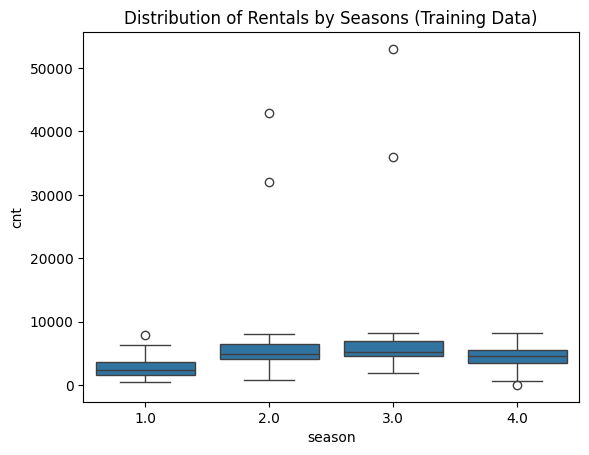

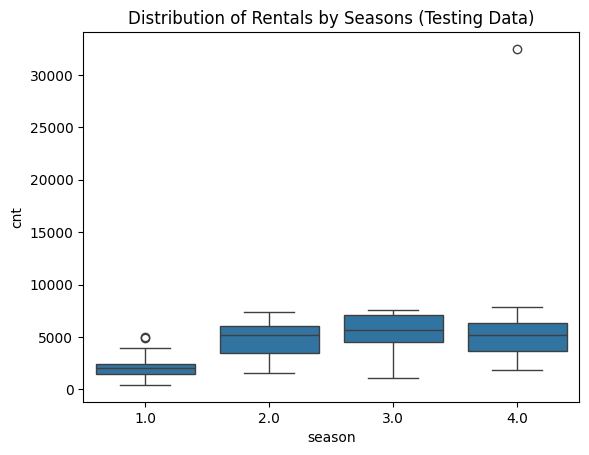

In [39]:
# Visualize the distribution of rentals in different seasons
sns.boxplot(x='season', y='cnt', data=df_train)
plt.title('Distribution of Rentals by Seasons (Training Data)')
plt.show()

sns.boxplot(x='season', y='cnt', data=df_test)
plt.title('Distribution of Rentals by Seasons (Testing Data)')
plt.show()

We notice our 4 outliers on the training data again and the one in the testing data. Removing those would display the boxplots better, like the following:

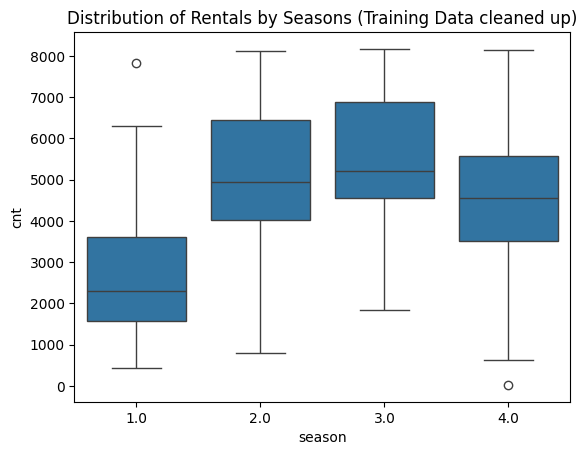

In [40]:
# Create a new DataFrame with rows where 'cnt' is not greater than 20000
filtered_df_train = df_train[df_train['cnt'] <= 20000]

sns.boxplot(x='season', y='cnt', data=filtered_df_train)
plt.title('Distribution of Rentals by Seasons (Training Data cleaned up)')
plt.show()

<hr>

<h1>Correlations</h1>

<h2> Training Data Correlations</h2>

In [41]:
# Compute the correlation matrix for all columns
correlation_matrix = df_train.corr()

# Create a heatmap of the entire correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix (Training Data)')
plt.show()

ValueError: could not convert string to float: '03.06.2011'

Strong Positive Correlations with `cnt`:
- `casual` has a high positive correlation (0.906860). This suggests a strong positive relationship between the count of casual users and the overall count of rentals.

- `registered` also has a relatively high positive correlation (0.581130). We can see that there are more Casual Users than registered users.


Moderate Positive Correlations with `cnt`:
- `temp` and `atemp` have positive correlations around 0.38. This suggests a moderate positive relationship between temperature, feeling-like temperature, the year, and the overall count of rentals.

Moderate Negative Correlations with `cnt`:
- `weathersit` has a moderate negative correlation (-0.184529). This suggests a moderate negative relationship between the weather situation and the overall count of rentals.

**Features with very low correlation with `cnt` might not contribute much information and could be candidates for removal. In our case, features like `leaflets`, `price reduction`, `holiday`, `weekday`, `workingday`, and `windspeed` have weak correlations.**

What suprised us here, is that `price reduction` has such a weak correlation (0.008591) on the `count` of rentals, which means that giving out discounts does not have an impact on bike rentals.

<h2>Test Data Correlation</h2>

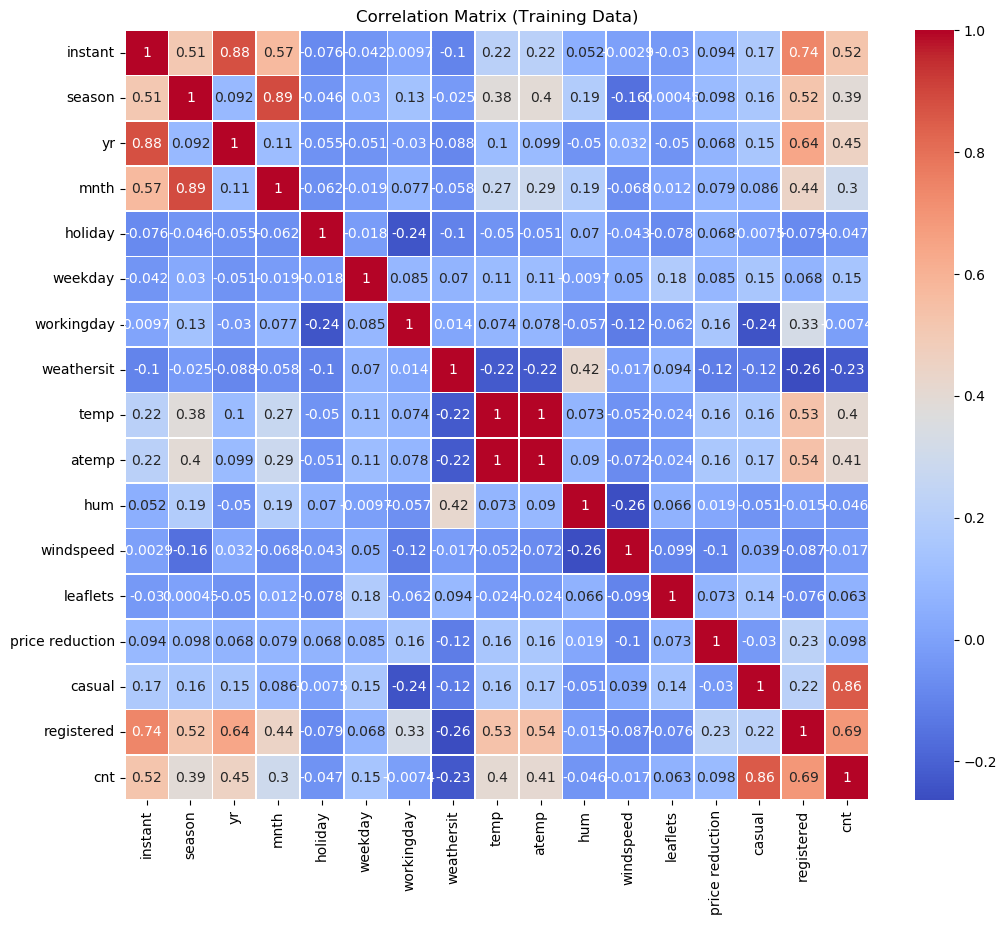

In [ ]:
# Create a heatmap of the entire correlation matrix

correlation_matrix_test = df_test.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_test, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix (Training Data)')
plt.show()

The Testing Data Correlations don't deviate noticably from the training data

<hr>

**More checking for outliers**

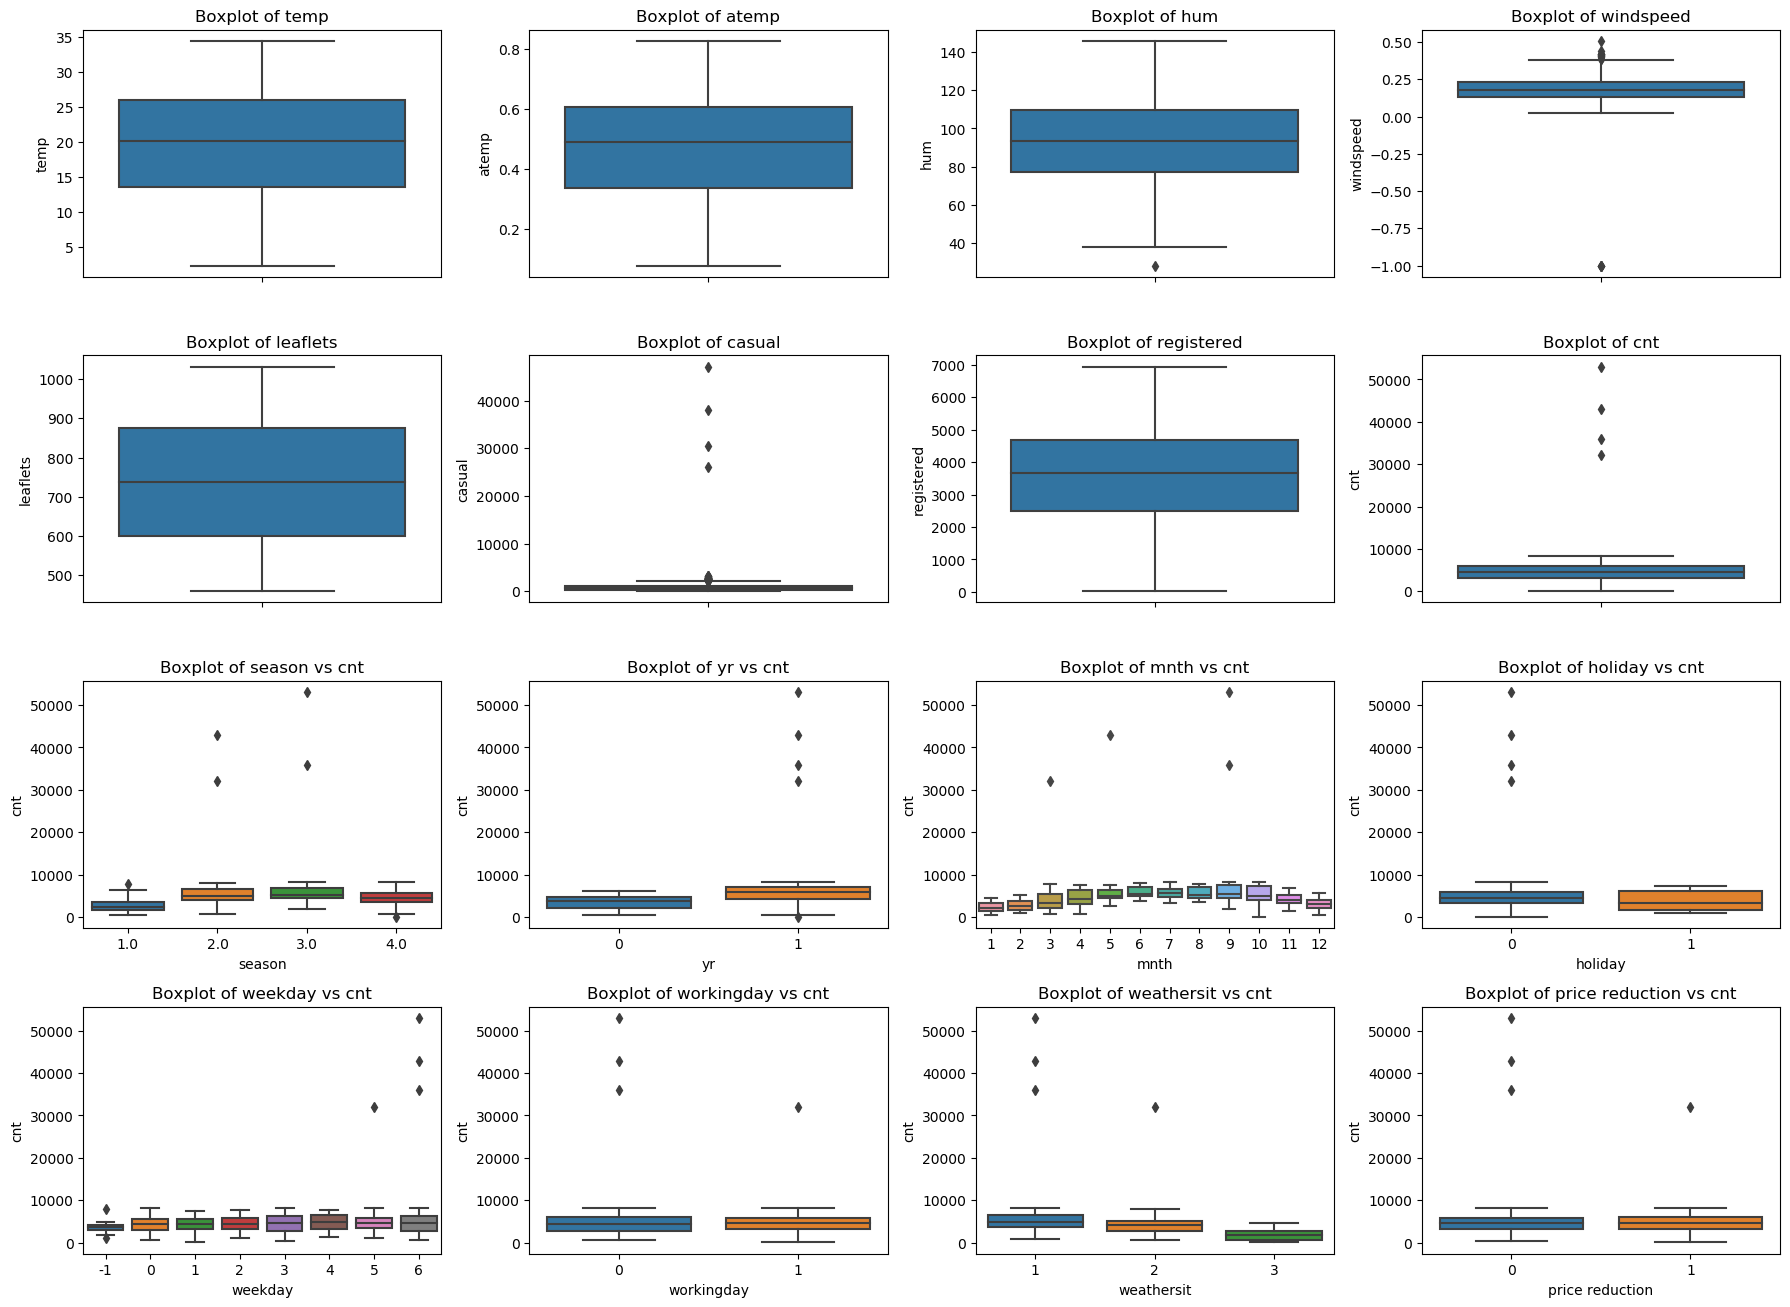

In [ ]:
# Creating boxplots for relevant variables to identify patterns and outliers
plt.figure(figsize=(18, 16))

# Numeric columns
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'leaflets', 'casual', 'registered', 'cnt']

# Categorical columns
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'price reduction']

# Adjusting layout to accommodate all subplots
total_subplots = len(numeric_cols) + len(categorical_cols)
rows = (total_subplots // 4) + 1
cols = min(total_subplots, 4)

# Creating boxplots for each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df_train[col])
    plt.title(f'Boxplot of {col}')

# Creating boxplots for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + len(numeric_cols) + 1)
    sns.boxplot(x=df_train[col], y=df_train['cnt'])
    plt.title(f'Boxplot of {col} vs cnt')

plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()

**Oberservations of the Boxplots**

- we see that `hum` not only has values above 140 as we saw in the beginning, but also a value very close to 0, which is not likely to be true.

- `windspeed` has a very low outlier

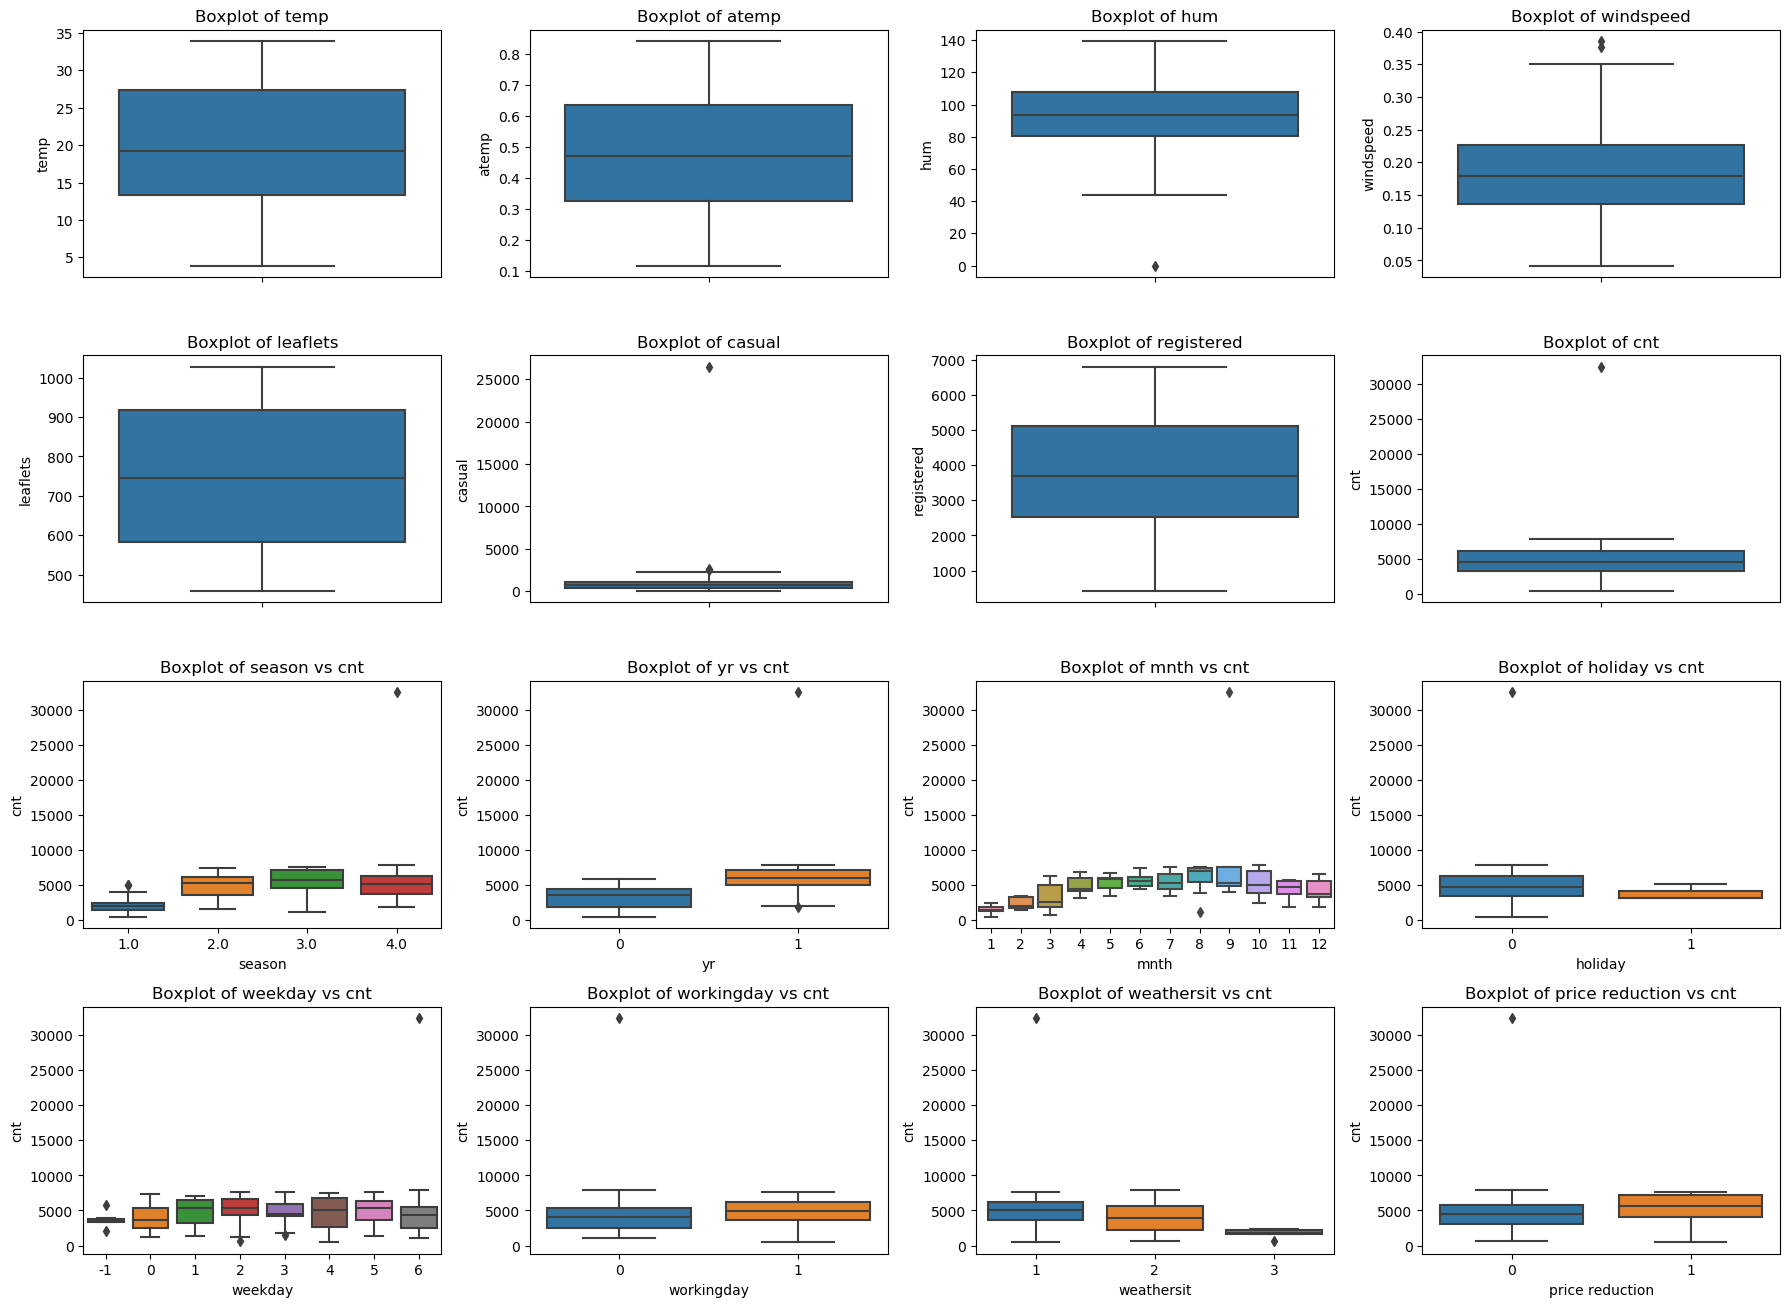

In [ ]:
# Creating boxplots for relevant variables to identify patterns and outliers
plt.figure(figsize=(18, 16))

# Numeric columns
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'leaflets', 'casual', 'registered', 'cnt']

# Categorical columns
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'price reduction']

# Adjusting layout to accommodate all subplots
total_subplots = len(numeric_cols) + len(categorical_cols)
rows = (total_subplots // 4) + 1
cols = min(total_subplots, 4)

# Creating boxplots for each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df_test[col])
    plt.title(f'Boxplot of {col}')

# Creating boxplots for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + len(numeric_cols) + 1)
    sns.boxplot(x=df_test[col], y=df_test['cnt'])
    plt.title(f'Boxplot of {col} vs cnt')

plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()


**Oberservations of the Boxplots on the test data**

- we only notice our known outlier of the casual `count`

- `hum` also has a very low value

<hr>

<h1>Summary of Task 1 in view of Task 2</h1>